In [18]:
import uproot as up
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import pandas as pd
import mplhep as hep
hep.style.use(hep.style.CMS)
import ROOT
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# open the file
file = up.open('../output/ZmmMCOut.root')
tree = file['ntuple;1']
print(f"Title of the TTree: {tree.title}")

columns = ['Y_TriggerPath',
           'Z_soft1', 'Z_soft2',
           'Z_mass',
           'Z_pt1', 'Z_pt2', 'Z_eta1', 'Z_eta2',
           'Z_lowPt', 'Z_highPt',
           'Z_trackIso1', 'Z_trackIso2',
           'Y_mass',
           'Y_pt1', 'Y_pt2', 'Y_eta1', 'Y_eta2',
           'Y_mvaIsoWP90_1', 'Y_mvaIsoWP90_2',
           'Z_VtxProb', 'Y_VtxProb',
           'FourL_mass', 'FourL_VtxProb']
# branches = events.arrays(columns, entry_start=430, entry_stop=450)
branches = tree.arrays(columns)

Title of the TTree: 2018B MC with HLT_IsoMu24_v HLT_Ele27_WPTight_Gsf_v


In [20]:
def print_summary(data, text):
    events = len(data)
    candidates = np.sum(ak.num(branches['Z_mass'], axis=1))

    print(f"Number of events {text}: {events}")
    print(f"Number of candidates {text}: {candidates}")

In [21]:
print_summary(branches, 'Preselection')

Number of events Preselection: 3330
Number of candidates Preselection: 3511


In [22]:
cut_YTrigger_candi = branches['Y_TriggerPath']
cut_YTrigger_event = ak.any(cut_YTrigger_candi, axis=1)

branches = branches[cut_YTrigger_candi][cut_YTrigger_event]
branches = branches[ak.num(branches.Z_mass, axis=1) > 0]

print_summary(branches, "Trigger")

Number of events Trigger: 3111
Number of candidates Trigger: 3275


In [23]:
cut_Zsoft_candi = branches['Z_soft1'] & branches['Z_soft2']
cut_Zsoft_event = ak.any(cut_Zsoft_candi, axis=1)

branches = branches[cut_Zsoft_candi][cut_Zsoft_event]

print_summary(branches, "Soft Muons")

Number of events Soft Muons: 3075
Number of candidates Soft Muons: 3211


In [24]:
cut_YmvaIso_candi = branches['Y_mvaIsoWP90_1'] | branches['Y_mvaIsoWP90_2']
cut_YmvaIso_event = ak.any(cut_YmvaIso_candi, axis=1)

branches = branches[cut_YmvaIso_candi][cut_YmvaIso_event]

print_summary(branches, "YmvaIso")

Number of events YmvaIso: 2910
Number of candidates YmvaIso: 3002


Number of events Detector: 2713
Number of candidates Detector: 2759


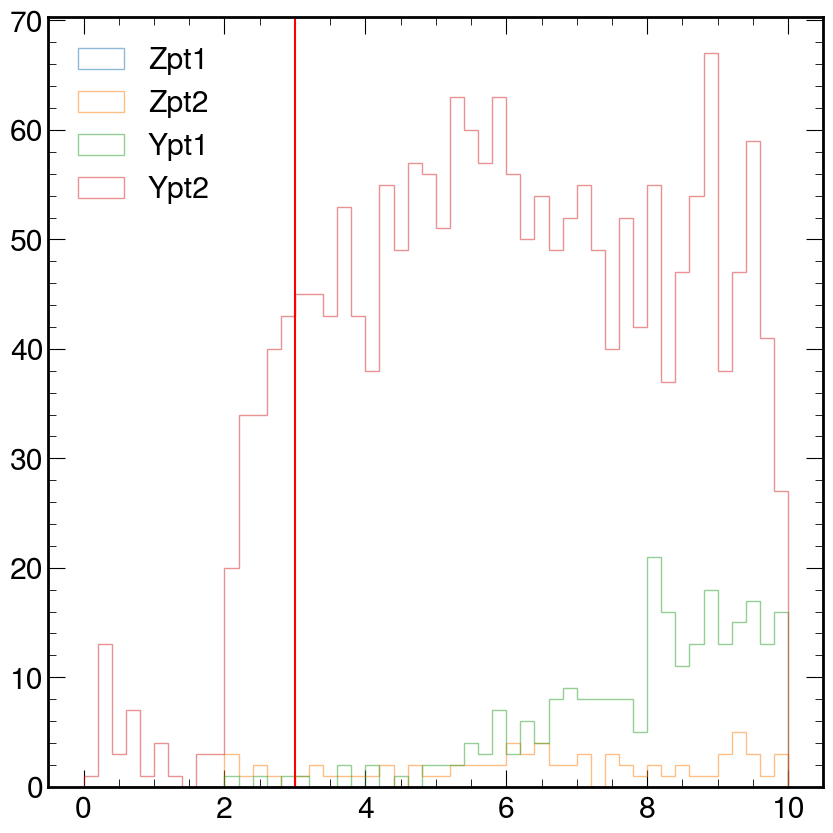

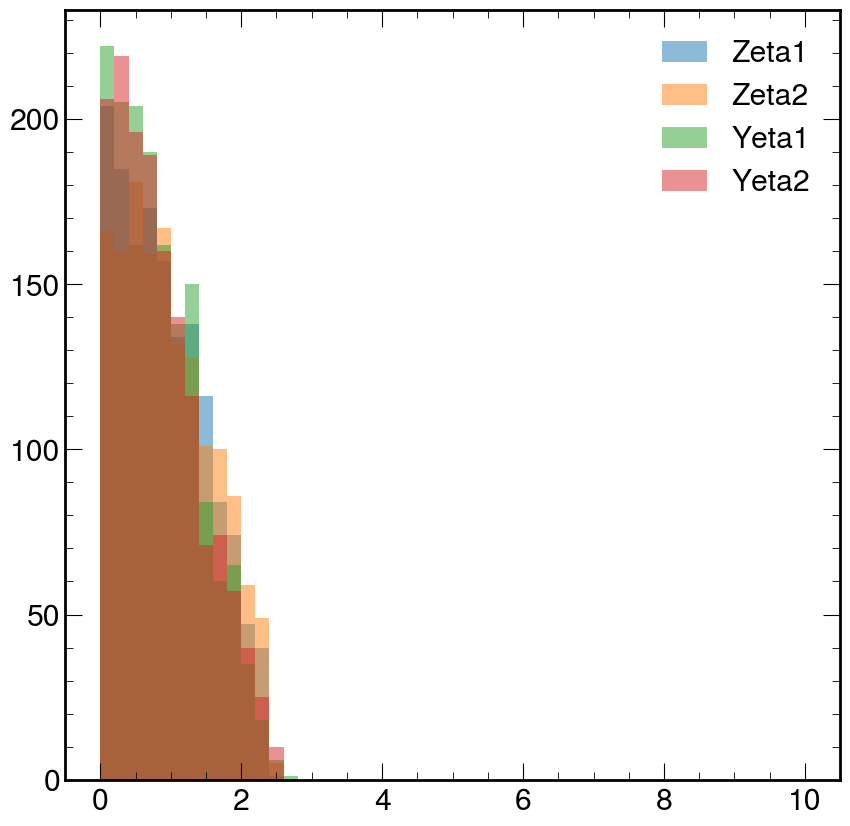

In [25]:
cut_Pt_candi = (branches['Z_pt1'] > 3.0) & (branches['Z_pt2'] > 3.0) & (branches['Y_pt1'] > 3.0) & (branches['Y_pt2'] > 3.0)
cut_eta_candi = (abs(branches['Z_eta1']) < 2.4) & (abs(branches['Z_eta2']) < 2.4) & (abs(branches['Y_eta1']) < 2.5) & (abs(branches['Y_eta2']) < 2.5)
cut_detector_candi = cut_Pt_candi & cut_eta_candi
cut_detector_event = ak.any(cut_detector_candi, axis=1)

plt.hist(ak.flatten(branches.Z_pt1), bins=50, label="Zpt1", range=(0, 10), alpha=0.5, histtype='step')
plt.hist(ak.flatten(branches.Z_pt2), bins=50, label="Zpt2", range=(0, 10), alpha=0.5, histtype='step')
plt.hist(ak.flatten(branches.Y_pt1), bins=50, label="Ypt1", range=(0, 10), alpha=0.5, histtype='step')
plt.hist(ak.flatten(branches.Y_pt2), bins=50, label="Ypt2", range=(0, 10), alpha=0.5, histtype='step')
plt.axvline(3.0, color='r')
plt.legend()

plt.figure()
plt.hist(ak.flatten(branches.Z_eta1), bins=50, label="Zeta1", range=(0, 10), alpha=0.5)  # , histtype='step')
plt.hist(ak.flatten(branches.Z_eta2), bins=50, label="Zeta2", range=(0, 10), alpha=0.5)  # , histtype='step')
plt.hist(ak.flatten(branches.Y_eta1), bins=50, label="Yeta1", range=(0, 10), alpha=0.5)  # , histtype='step')
plt.hist(ak.flatten(branches.Y_eta2), bins=50, label="Yeta2", range=(0, 10), alpha=0.5)  # , histtype='step')
plt.legend()

branches = branches[cut_detector_candi][cut_detector_event]

print_summary(branches, "Detector")

Number of events Dilepton Vtx: 2604
Number of candidates Dilepton Vtx: 2645


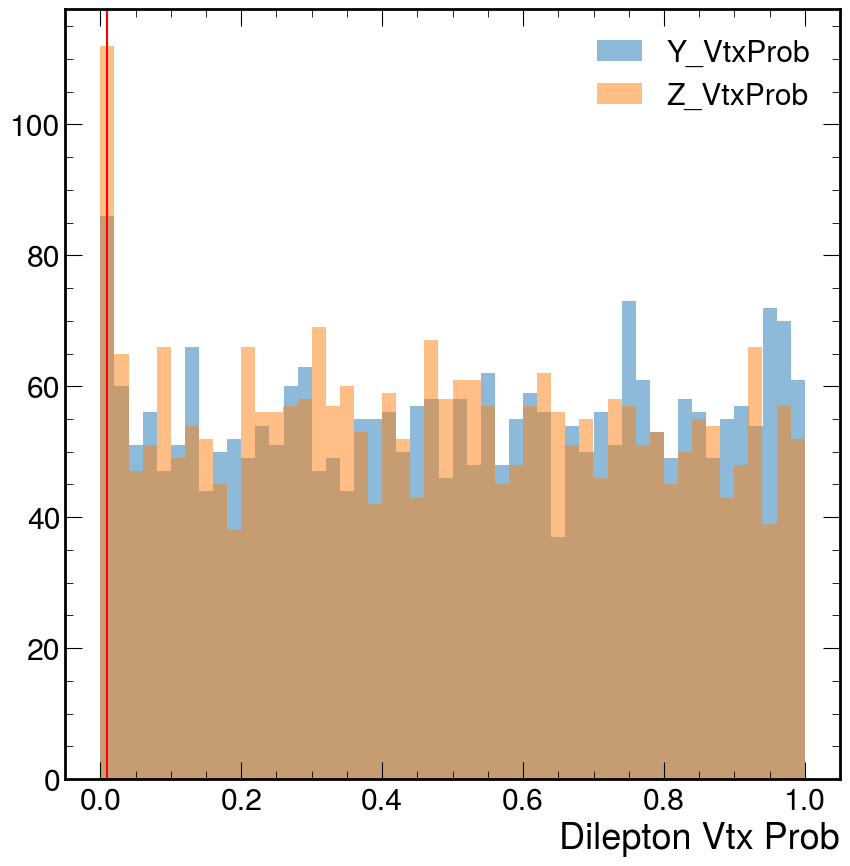

In [26]:
cut_dilepton_candi = (branches['Y_VtxProb'] > 0.01) & (branches['Z_VtxProb'] > 0.01)
cut_dilepton_event = ak.any(cut_dilepton_candi, axis=1)

plt.hist(ak.flatten(branches.Y_VtxProb), bins=50, label="Y_VtxProb", alpha=0.5)
plt.hist(ak.flatten(branches.Z_VtxProb), bins=50, label="Z_VtxProb", alpha=0.5)
plt.axvline(x=0.01, color='r')
plt.xlabel('Dilepton Vtx Prob')
plt.legend()

branches = branches[cut_dilepton_candi][cut_dilepton_event]

print_summary(branches, "Dilepton Vtx")

Number of events FourL Vtx: 2536
Number of candidates FourL Vtx: 2575


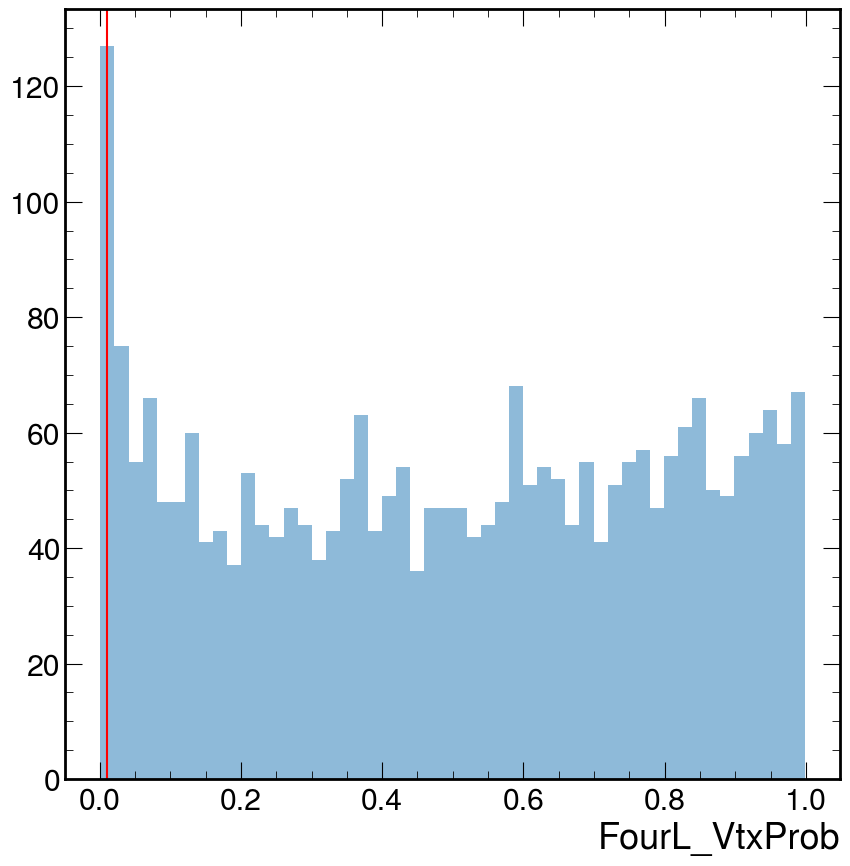

In [27]:
cut_FourL_candi = (branches['FourL_VtxProb'] > 0.01)
cut_FourL_event = ak.any(cut_FourL_candi, axis=1)

plt.hist(ak.flatten(branches.FourL_VtxProb), bins=50, label="FourL_VtxProb", alpha=0.5)
plt.axvline(x=0.01, color='r')
plt.xlabel('FourL_VtxProb')

branches = branches[cut_FourL_candi][cut_FourL_event]

print_summary(branches, "FourL Vtx")

Number of events Y mass: 1558
Number of candidates Y mass: 1575


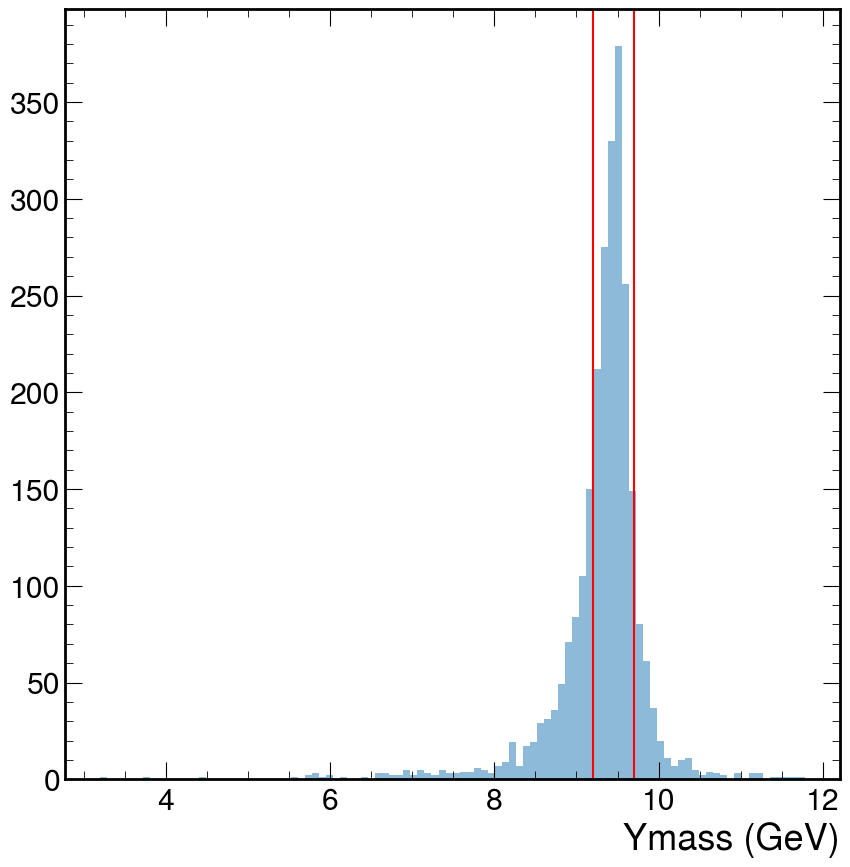

In [28]:
cut_Ymass_candi = (branches['Y_mass'] > 9.2) & (branches['Y_mass'] < 9.7)
cut_Ymass_event = ak.any(cut_Ymass_candi, axis=1)

plt.hist(ak.flatten(branches.Y_mass), bins=100, label="Y_mass", alpha=0.5)
plt.axvline(x=9.2, color='r')
plt.axvline(x=9.7, color='r')
plt.xlabel('Ymass (GeV)')

branches = branches[cut_Ymass_candi][cut_Ymass_event]

print_summary(branches, "Y mass")

Number of events Z mass: 1488
Number of candidates Z mass: 1497


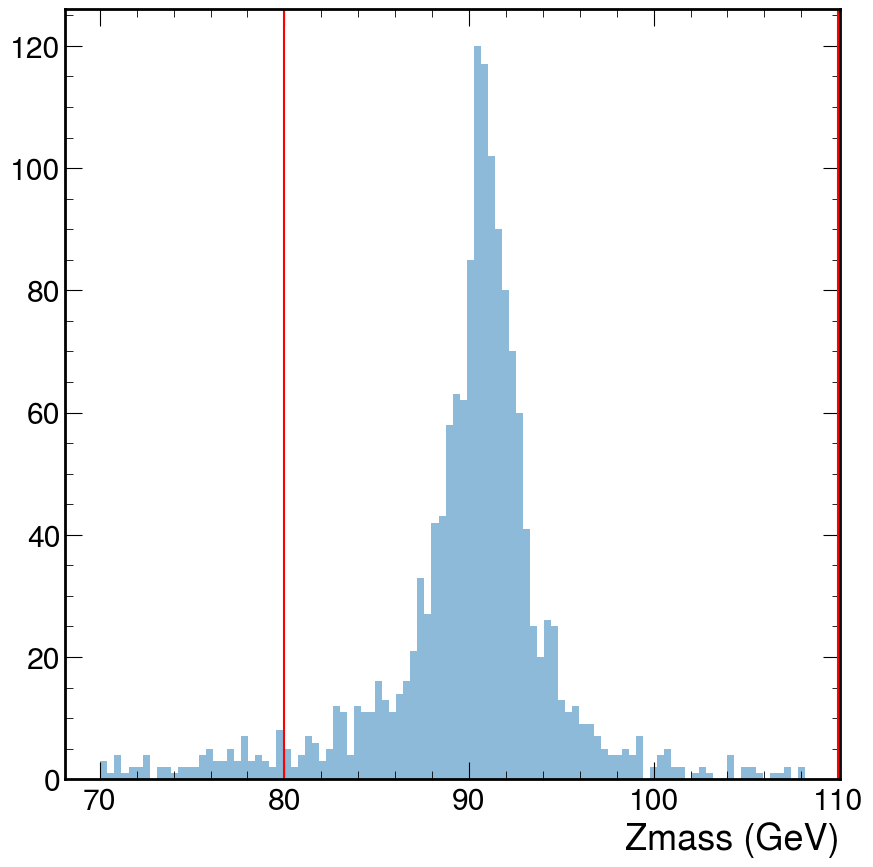

In [29]:
cut_Zmass_candi = (branches['Z_mass'] > 80) & (branches['Z_mass'] < 110)
cut_Zmass_event = ak.any(cut_Zmass_candi, axis=1)

plt.hist(ak.flatten(branches.Z_mass), bins=100, label="Z_mass", alpha=0.5)
plt.axvline(x=80, color='r')
plt.axvline(x=110, color='r')
plt.xlabel('Zmass (GeV)')

branches = branches[cut_Zmass_candi][cut_Zmass_event]

print_summary(branches, "Z mass")

Number of events FourL mass: 1482
Number of candidates FourL mass: 1488


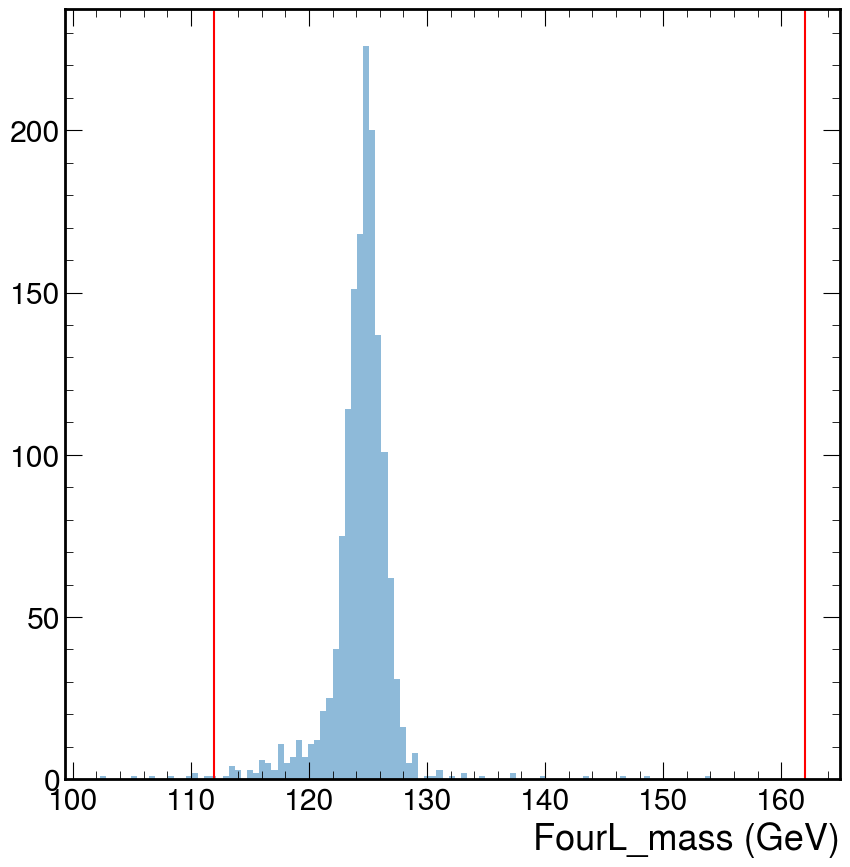

In [30]:
cut_FourLmass_candi = (branches['FourL_mass'] >= 112) & (branches['FourL_mass'] <= 162)
cut_FourLmass_event = ak.any(cut_FourLmass_candi, axis=1)

plt.hist(ak.flatten(branches.FourL_mass), bins=100, label="FourL_mass", alpha=0.5)
plt.axvline(x=112, color='r')
plt.axvline(x=162, color='r')
plt.xlabel('FourL_mass (GeV)')

branches = branches[cut_FourLmass_candi][cut_FourLmass_event]

print_summary(branches, "FourL mass")

Number of events ZTrackIso: 575
Number of candidates ZTrackIso: 575


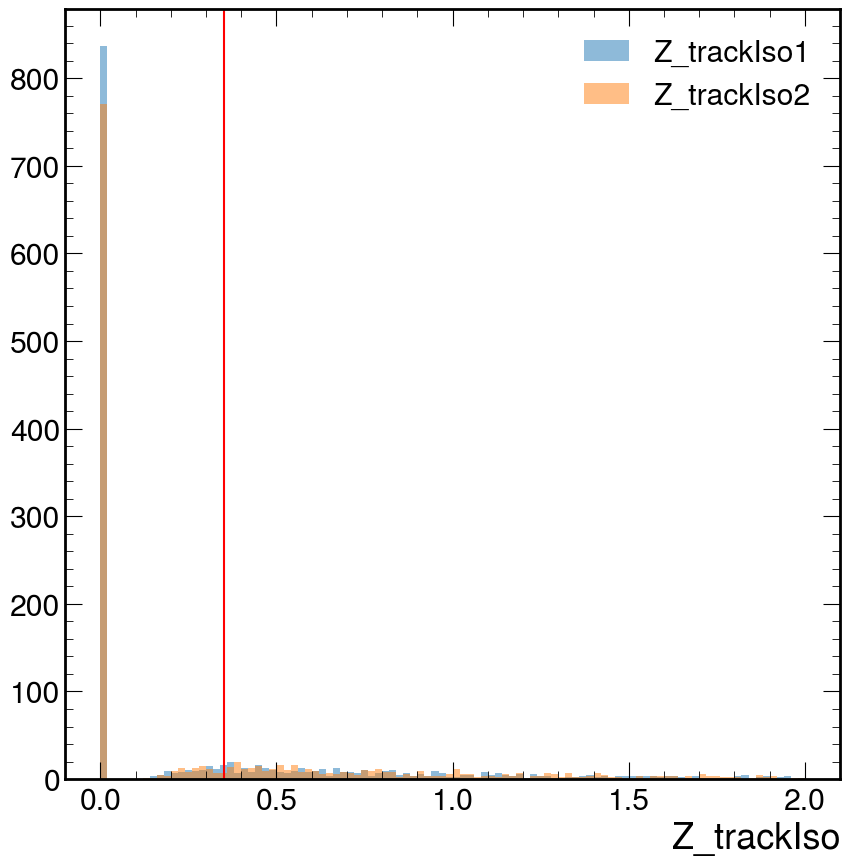

In [31]:
highestPt_muon = ak.argmax(branches.Z_highPt, axis=1, keepdims=True, mask_identity=True)

cut_ZtrackIso_candi = (branches['Z_trackIso1'][highestPt_muon] < 0.35) & (branches['Z_trackIso2'][highestPt_muon] < 0.35)
cut_ZtrackIso_event = ak.any(cut_ZtrackIso_candi, axis=1)

plt.hist(ak.flatten(branches.Z_trackIso1[highestPt_muon]), bins=100, range=(0, 2), label="Z_trackIso1", alpha=0.5)
plt.hist(ak.flatten(branches.Z_trackIso2[highestPt_muon]), bins=100, range=(0, 2), label="Z_trackIso2", alpha=0.5)
plt.axvline(x=0.35, color='r')
plt.xlabel('Z_trackIso')
# plt.xlim([0,1])
plt.legend()

branches = branches[cut_ZtrackIso_candi][cut_ZtrackIso_event]

print_summary(branches, "ZTrackIso")

In [32]:
# cut_blind_candi = (branches['FourL_mass'] <= 120) | (branches['FourL_mass'] >= 130)
# cut_blind_event = ak.any(cut_blind_candi, axis=1)

# branches = branches[cut_blind_candi][cut_blind_event]

# print_summary(branches, "Blind")

In [33]:
for i, entry in enumerate(branches['Z_soft1']):
    if len(entry)>1:
        print(entry)
        if len(set(entry)) > 1:
            print(i)
            print("Diff")